-------
# **Project - Image Classification**
## *Shaikh Mariyam Harunor Rashid - A20MJ4010*
-------

##**Table of Contents**
|No.| Content       |
|---|---------------|
| 1.| Importing libraries  |
| 2.| Load and Preprocess Dataset |
| 3.| Split Dataset into Training and Testing Sets|
| 4.| Define Neural Network Model for Flowers|
| 5.| Apply Data Augmentation and Train Model|
| 6.| Image Prediction using Model|

<br>

----
----

# 1. Importing Libraries

In [1]:
import os
import io
import cv2
import requests
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from random import sample
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam,Adagrad,Adadelta
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image

numpy: NumPy is used for numerical operations in Python.

os: The os module provides a way to interact with the operating system, and in this code, it's used for file and path operations.

cv2: The OpenCV library (cv2) is used for computer vision tasks, such as reading and manipulating images. It's a powerful library for image processing.

matplotlib.pyplot as plt: Matplotlib is a plotting library in Python, and pyplot is a module within Matplotlib used for creating visualizations. It's used here to display images.

random.sample: The sample function from the random module is used to randomly select a specified number of items from a sequence (e.g., list of images).

LabelEncoder from sklearn.preprocessing: This is used to convert categorical labels (flower types) into numerical labels.

to_categorical from keras.utils: This function is used to convert numerical class labels to one-hot encoded vectors, suitable for training a neural network.

Sequential and various layers from keras.models: These are used to define the architecture of a sequential neural network.

train_test_split from sklearn.model_selection: This function is used to split the dataset into training and testing sets.

ReduceLROnPlateau from keras.callbacks: This callback is used to adjust the learning rate during training, helping to improve model convergence.

Adam, Adagrad, Adadelta from keras.optimizers: These are optimization algorithms used to minimize the loss function during training.

io, requests: These modules are used to handle input/output operations and make HTTP requests, respectively.

ipywidgets and display from IPython.display: These are used to create interactive widgets (text input for image URL) and display them.

Image from PIL: This is used to handle and process images, including opening, resizing, and converting between different formats.

# 2. Load and Preprocess Dataset

In [2]:
CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
IMG_SIZE = 150
DATA_DIR = '/content/drive/MyDrive/flowers'

def flower_name(flower_type):
    return flower_type

X = []
Z = []

def make_train_data(flower_type, DIR):
    for img in os.listdir(DIR):
        label = flower_name(flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

# Iterate over each category and call make_train_data function
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    make_train_data(category, path)

# Convert the data to NumPy arrays
X = np.array(X)
Z = np.array(Z)

This code loads flower images from different categories (daisy, dandelion, rose, sunflower, tulip) for training the model. Using the OpenCV library, it reads and resizes the images, organizing the data into NumPy arrays. The images are stored in the array X, while the corresponding labels are stored in the array Y. The function train_model iterates through each flower category, reads images, and populates the X and Y arrays. The resulting data can be used for training a classification model to recognize and categorize different types of flowers.

This code uses Matplotlib to create a grid of subplots, where each row represents a different flower category (daisy, dandelion, rose, sunflower, tulip). Two randomly selected images from each category are displayed in the columns. Images are loaded using OpenCV, resized to a specified dimension (200px x 200px), and then showcased in the subplots. The resulting visualization provides a random sampling of flower images, offering a visual representation of the dataset's diversity and the appearance of different flower types.

In [3]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In this code, the LabelEncoder from scikit-learn is used to encode the flower labels (Y) into numerical values (Z). The encoded labels are then one-hot encoded using to_categorical from Keras to convert them into a format suitable for classification tasks. The image data (X) is converted into a NumPy array and normalized by scaling its values between 0 and 1 by dividing them by 255. These preprocessing steps are common when preparing data for training a model.

# 3. Split Dataset into Training and Testing Sets


In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

This code uses the train_test_split function from scikit-learn to partition the dataset into training and testing sets. The input data (X) and corresponding labels (Z) are divided into training (x_train, y_train) and testing (x_test, y_test) sets, with 25% of the data allocated for testing. The random_state parameter ensures reproducibility by fixing the seed for the random number generator.

# 4. Define Neural Network Model for Flowers


In [5]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

This code defines a Convolutional Neural Network (CNN) using the Sequential model from Keras. The architecture consists of several convolutional layers, each followed by max-pooling layers to downsample the feature maps. The final layers include a flatten layer to transform the 2D feature maps into a 1D vector, a dense layer with 512 neurons and ReLU activation, and an output layer with 5 neurons (equal to the number of flower categories) using softmax activation for multi-class classification. This model is designed for image classification tasks.

# 5. Apply Data Augmentation and Train Model

In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [7]:
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

model.compile(optimizer=Adam(learning_rate = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

History = model.fit(datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 20, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/20
101/101 [==============================] - 204s 2s/step - loss: 1.3500 - accuracy: 0.4056 - val_loss: 1.1657 - val_accuracy: 0.5296
Epoch 2/20
101/101 [==============================] - 204s 2s/step - loss: 1.1019 - accuracy: 0.5576 - val_loss: 1.0130 - val_accuracy: 0.6148
Epoch 3/20
101/101 [==============================] - 197s 2s/step - loss: 1.0371 - accuracy: 0.5953 - val_loss: 0.9492 - val_accuracy: 0.6287
Epoch 4/20
101/101 [==============================] - 195s 2s/step - loss: 0.9326 - accuracy: 0.6334 - val_loss: 0.8936 - val_accuracy: 0.6444
Epoch 5/20
101/101 [==============================] - 196s 2s/step - loss: 0.8997 - accuracy: 0.6537 - val_loss: 0.8227 - val_accuracy: 0.6852
Epoch 6/20
101/101 [==============================] - 193s 2s/step - loss: 0.8388 - accuracy: 0.6699 - val_loss: 0.7611 - val_accuracy: 0.7204
Epoch 7/20
101/101 [==============================] - 198s 2s/step - loss: 0.7978 - accuracy: 0.6914 - val_loss: 0.7537 - val_accuracy: 0.7176

In this code, an ImageDataGenerator is used to augment the training dataset, introducing variations such as rotations, shifts, zooming, and horizontal flips. The data generator is fitted on the training set (x_train) to enable real-time data augmentation during training.

A ReduceLROnPlateau callback is implemented to dynamically adjust the learning rate during training. If the validation accuracy does not improve for a given number of epochs (specified by patience), the learning rate is reduced by a factor of 0.1, aiming to enhance model convergence.

The CNN model is compiled using the Adam optimizer with a specified learning rate of 0.001, categorical crossentropy as the loss function, and accuracy as the metric. The model is then trained using the fit method, utilizing the flow method of the data generator to generate augmented batches. Training is performed for 20 epochs, with validation data provided for monitoring, and the steps_per_epoch parameter set based on the batch size.

# 6. Image Prediction using model


Text(value='', description='Image URL:', placeholder='Enter Image URL')

1/1 [==============================] - 0s 50ms/step


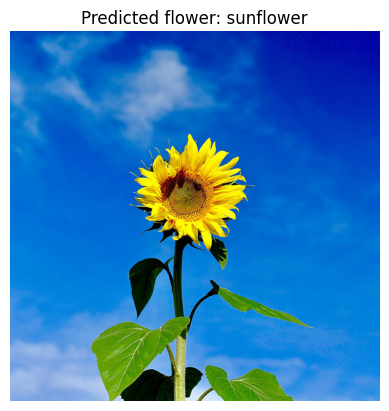

daisy: 0.81%
dandelion: 7.63%
rose: 10.55%
sunflower: 69.53%
tulip: 11.49%
1/1 [==============================] - 0s 32ms/step


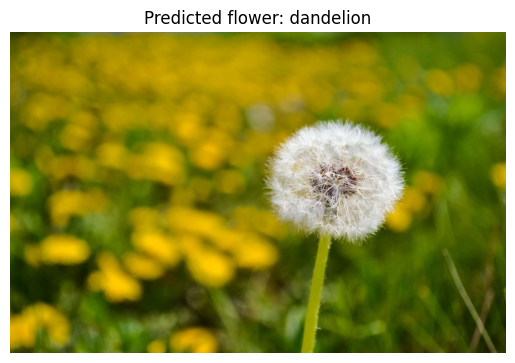

daisy: 4.32%
dandelion: 93.24%
rose: 1.16%
sunflower: 0.43%
tulip: 0.86%
1/1 [==============================] - 0s 32ms/step


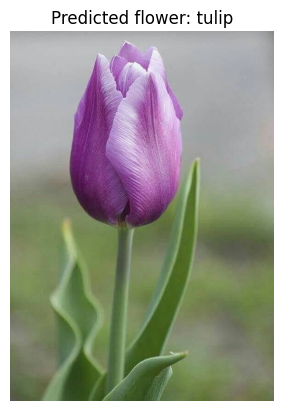

daisy: 4.21%
dandelion: 2.13%
rose: 35.92%
sunflower: 3.18%
tulip: 54.56%
1/1 [==============================] - 0s 32ms/step


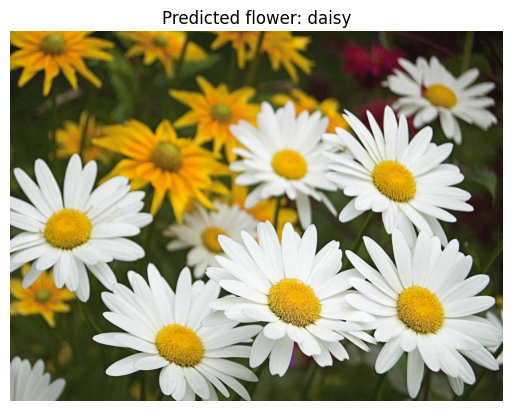

daisy: 80.00%
dandelion: 14.82%
rose: 2.98%
sunflower: 1.31%
tulip: 0.89%
1/1 [==============================] - 0s 32ms/step


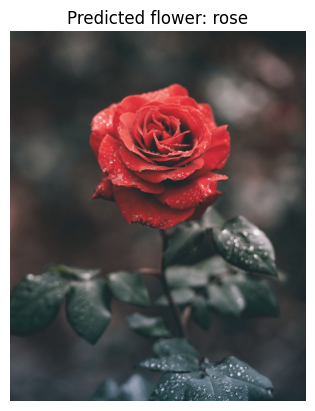

daisy: 9.15%
dandelion: 31.56%
rose: 40.96%
sunflower: 3.51%
tulip: 14.81%


In [9]:
# Function to preprocess the downloaded image
def preprocess_downloaded_image(image_content):
    img = Image.open(io.BytesIO(image_content)).convert("RGB")
    img = img.resize((150, 150))  # Resize the image to match the model's input shape
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to handle the image URL input
def handle_url_input(change):
    if not change.new:
        return

    # Get the image URL
    image_url = change.new

    try:
        # Download the image
        response = requests.get(image_url)
        response.raise_for_status()

        # Preprocess the downloaded image
        img_array = preprocess_downloaded_image(response.content)

        # Use the trained model to predict the class
        predictions = model.predict(img_array)

        # Get the predicted class label
        predicted_class = np.argmax(predictions)

        # Map the predicted class label to the corresponding flower category
        predicted_flower = CATEGORIES[predicted_class]

        # Display the downloaded image and predicted flower
        img = Image.open(io.BytesIO(response.content))
        plt.imshow(img)
        plt.title(f'Predicted flower: {predicted_flower}')
        plt.axis('off')
        plt.show()

        # Display probabilities for each category
        for i, category in enumerate(CATEGORIES):
            probability = predictions[0][i]
            print(f'{category}: {probability * 100:.2f}%')

    except Exception as e:
        print(f"Error processing image: {e}")

# Create a text input widget for the image URL
url_input = widgets.Text(placeholder='Enter Image URL', description='Image URL:')
url_input.observe(handle_url_input, names='value')

# Display the URL input widget
display(url_input)

This code defines a simple interactive widget for predicting flower categories from images via URL input. The 'handle_url_input' function downloads the image from the provided URL, preprocesses it to match the model's input shape, and then uses the trained model to predict the flower category. The result, including the predicted flower, the image, and category probabilities, is displayed interactively. Users can input an image URL in the provided text box to trigger predictions.